# üìà Regress√£o em ML: Segunda Aula - Pr√°tica

<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab03/regressao-pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## üéØ O que voc√™ vai aprender hoje:

- ‚úÖ **Diferen√ßa** entre classifica√ß√£o e regress√£o
- ‚úÖ **Implementar** regress√£o linear no scikit-learn
- ‚úÖ **Avaliar** modelos com m√©tricas apropriadas
- ‚úÖ **Explorar** regress√£o polinomial
- ‚úÖ **Entender** overfitting vs underfitting

---

## üîç 1. Regress√£o vs Classifica√ß√£o

### ü§î Qual a diferen√ßa?

| **Classifica√ß√£o** | **Regress√£o** |
|-------------------|---------------|
| Prediz **categorias** | Prediz **n√∫meros** |
| "Gato" ou "Cachorro" | Pre√ßo: $250.000 |
| "Spam" ou "Normal" | Temperatura: 23.5¬∞C |
| Discreto | Cont√≠nuo |

### üè† Nosso problema hoje: **Pre√ßo de Casas**
**Entrada**: Caracter√≠sticas da casa (renda da regi√£o, idade, quartos...)
**Sa√≠da**: Pre√ßo da casa (valor num√©rico)

‚úÖ **√â REGRESS√ÉO** porque queremos predizer um n√∫mero!

## üìö 2. Importando as Bibliotecas

**N√£o se preocupe em decorar!** Vamos explicar cada uma conforme usamos.

In [1]:
# üìä Para trabalhar com dados
import pandas as pd              # Tabelas de dados
import numpy as np              # C√°lculos matem√°ticos

# üìà Para criar gr√°ficos
import matplotlib.pyplot as plt  # Gr√°ficos b√°sicos
import seaborn as sns           # Gr√°ficos mais bonitos

# ü§ñ Machine Learning (nossa estrela!)
from sklearn.datasets import fetch_california_housing  # Dataset de casas
from sklearn.model_selection import train_test_split   # Dividir treino/teste
from sklearn.linear_model import LinearRegression      # Regress√£o Linear
from sklearn.preprocessing import PolynomialFeatures   # Regress√£o Polinomial

# üìè Para avaliar nossos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# üé® Deixar gr√°ficos bonitos
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("‚úÖ Todas as bibliotecas carregadas!")
print("üöÄ Vamos come√ßar nossa jornada com regress√£o!")

‚úÖ Todas as bibliotecas carregadas!
üöÄ Vamos come√ßar nossa jornada com regress√£o!


## üè† 3. Carregando os Dados: Casas da Calif√≥rnia

Vamos usar um dataset **real** sobre pre√ßos de casas. √â perfeito para aprender regress√£o!

In [2]:
# üì¶ Carregando o dataset
print("üì• Carregando dados das casas da Calif√≥rnia...")
housing = fetch_california_housing()

# üìã Criando uma tabela (DataFrame) organizada
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target  # Esta √© a coluna que queremos predizer!

print(f"‚úÖ Dados carregados!")
print(f"üìä Temos {df.shape[0]} casas e {df.shape[1]} informa√ß√µes sobre cada uma")
print("\nüîç Vamos ver as primeiras linhas:")
df.head()

üì• Carregando dados das casas da Calif√≥rnia...
‚úÖ Dados carregados!
üìä Temos 20640 casas e 9 informa√ß√µes sobre cada uma

üîç Vamos ver as primeiras linhas:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

### üìñ O que significa cada coluna?

| Coluna | Significado | Exemplo |
|--------|-------------|---------|
| **MedInc** | Renda m√©dia da regi√£o | 8.32 (dezenas de milhares) |
| **HouseAge** | Idade m√©dia das casas | 41.0 anos |
| **AveRooms** | N√∫mero m√©dio de quartos | 6.98 |
| **AveBedrms** | Quartos de dormir m√©dios | 1.02 |
| **Population** | Popula√ß√£o da √°rea | 322 pessoas |
| **AveOccup** | Ocupa√ß√£o m√©dia | 2.55 pessoas/casa |
| **Latitude** | Coordenada geogr√°fica | 37.88 |
| **Longitude** | Coordenada geogr√°fica | -122.23 |
| **target** | üéØ **PRE√áO** (nosso objetivo!) | 4.526 (centenas de milhares) |

**üí° Importante**: O pre√ßo est√° em centenas de milhares. 4.526 = $452,600

## üîç 4. Explorando os Dados (EDA)

Antes de treinar qualquer modelo, precisamos **conhecer nossos dados**!

In [3]:
# üìã Informa√ß√µes gerais
print("üìã INFORMA√á√ïES B√ÅSICAS")
print("=" * 30)
print(f"N√∫mero de casas: {df.shape[0]:,}")
print(f"N√∫mero de caracter√≠sticas: {df.shape[1]}")
print("\nüîç Tipos de dados:")
df.info()

print("\nüìä ESTAT√çSTICAS RESUMIDAS")
print("=" * 30)
df.describe().round(2)

üìã INFORMA√á√ïES B√ÅSICAS
N√∫mero de casas: 20,640
N√∫mero de caracter√≠sticas: 9

üîç Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

üìä ESTAT√çSTICAS RESUMIDAS


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude    target  
count  20640.00   20640.00  20640.00  
mean      35.63    -119.57      2.07  
std        2.14       2.00      1.15  
min       32.54    -124.35      0.15  
25%       33.93    -121.80      1.20  
50%       34.26    -118.49      1.80  
75%       37.71    -118.01      2.65  
max       41.95    -114.31      5.00

In [4]:
# üö® Verificando dados faltantes (muito importante!)
print("üîç VERIFICANDO DADOS FALTANTES")
print("=" * 30)
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

if dados_faltantes.sum() == 0:
    print("\n‚úÖ Excelente! N√£o temos dados faltantes.")
    print("üìä Isso facilita muito nossa an√°lise!")
else:
    print(f"\n‚ö†Ô∏è  Temos {dados_faltantes.sum()} dados faltantes para tratar.")

üîç VERIFICANDO DADOS FALTANTES
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

‚úÖ Excelente! N√£o temos dados faltantes.
üìä Isso facilita muito nossa an√°lise!


/var/folders/lk/j2v60jvx5sdgx3dm_16q4nxm0000gn/T/ipykernel_76956/2766775749.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


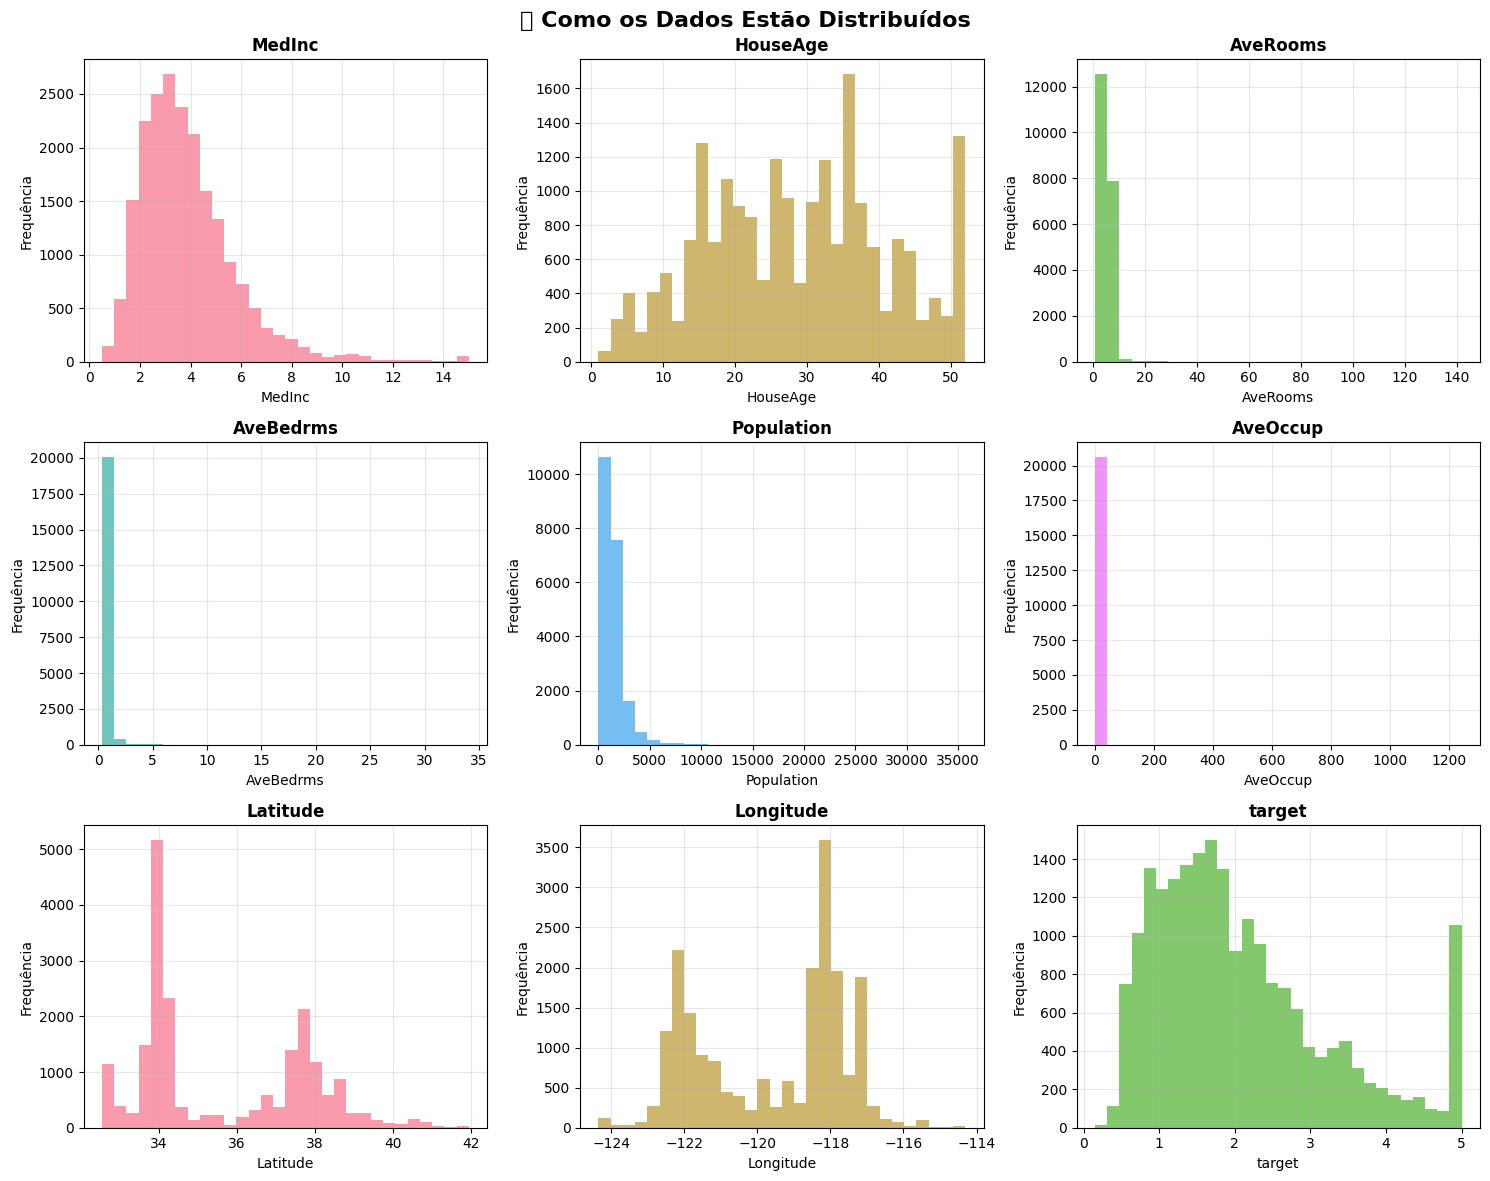

üí° O que observar:
‚Ä¢ As distribui√ß√µes parecem 'normais' (formato de sino)?
‚Ä¢ Existem valores muito extremos?
‚Ä¢ Os dados est√£o concentrados em alguma faixa?


In [5]:
# üìä Visualizando a distribui√ß√£o dos dados
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('üìä Como os Dados Est√£o Distribu√≠dos', fontsize=16, fontweight='bold')

for i, coluna in enumerate(df.columns):
    row = i // 3
    col = i % 3
    
    axes[row, col].hist(df[coluna], bins=30, alpha=0.7, 
                       color=sns.color_palette()[i % len(sns.color_palette())])
    axes[row, col].set_title(f'{coluna}', fontweight='bold')
    axes[row, col].set_xlabel(coluna)
    axes[row, col].set_ylabel('Frequ√™ncia')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("üí° O que observar:")
print("‚Ä¢ As distribui√ß√µes parecem 'normais' (formato de sino)?")
print("‚Ä¢ Existem valores muito extremos?")
print("‚Ä¢ Os dados est√£o concentrados em alguma faixa?")

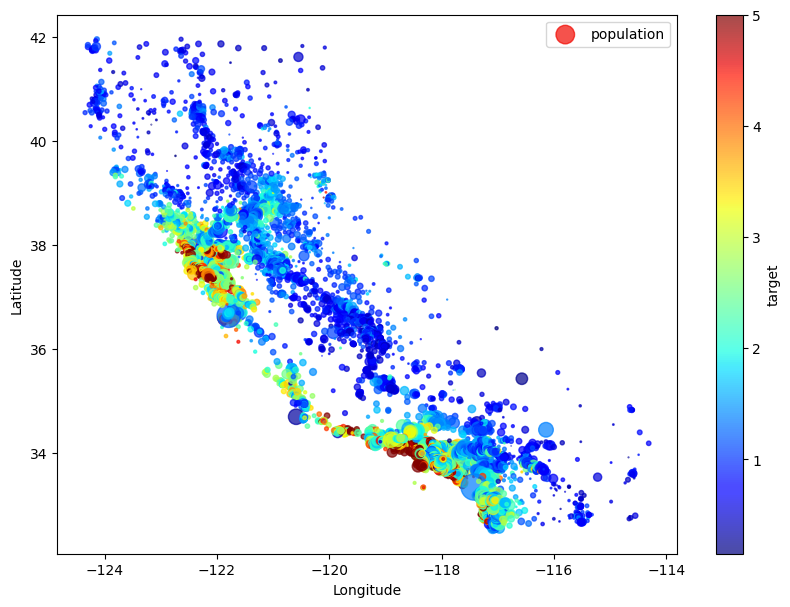

In [25]:
df.plot(kind="scatter", x="Longitude",y="Latitude", c="target", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Population']/100, label="population", alpha=0.7)
plt.show()

## üîó 5. Matriz de Correla√ß√£o: Quem se Relaciona?

**Correla√ß√£o** mede se duas vari√°veis "andam juntas":
- **+1**: Correla√ß√£o positiva perfeita (uma sobe ‚Üí outra sobe)
- **0**: Sem correla√ß√£o (s√£o independentes)
- **-1**: Correla√ß√£o negativa perfeita (uma sobe ‚Üí outra desce)

/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


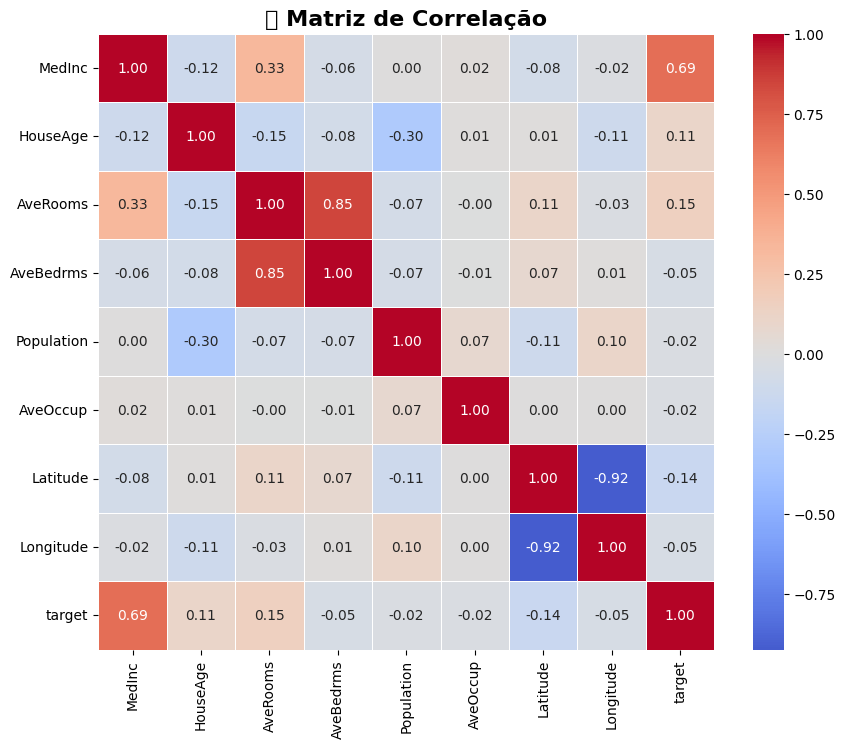

üéØ Correla√ß√µes com o PRE√áO (target):
üìà MedInc: 0.688
üìà AveRooms: 0.152
üìà HouseAge: 0.106
üìâ AveOccup: -0.024
üìâ Population: -0.025
üìâ Longitude: -0.046
üìâ AveBedrms: -0.047
üìâ Latitude: -0.144


In [6]:
# üîó Calculando e visualizando correla√ß√µes
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar n√∫meros
            cmap='coolwarm',      # Cores: azul = negativo, vermelho = positivo
            center=0,             # Zero no centro
            square=True,          # C√©lulas quadradas
            linewidths=0.5,       # Linhas entre c√©lulas
            fmt='.2f')            # 2 casas decimais

plt.title('üîó Matriz de Correla√ß√£o', fontsize=16, fontweight='bold')
plt.show()

print("üéØ Correla√ß√µes com o PRE√áO (target):")
correlacoes_target = correlation_matrix['target'].sort_values(ascending=False)
for variavel, correlacao in correlacoes_target.items():
    if variavel != 'target':
        emoji = "üìà" if correlacao > 0 else "üìâ"
        print(f"{emoji} {variavel}: {correlacao:.3f}")

/var/folders/lk/j2v60jvx5sdgx3dm_16q4nxm0000gn/T/ipykernel_76956/1718699509.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


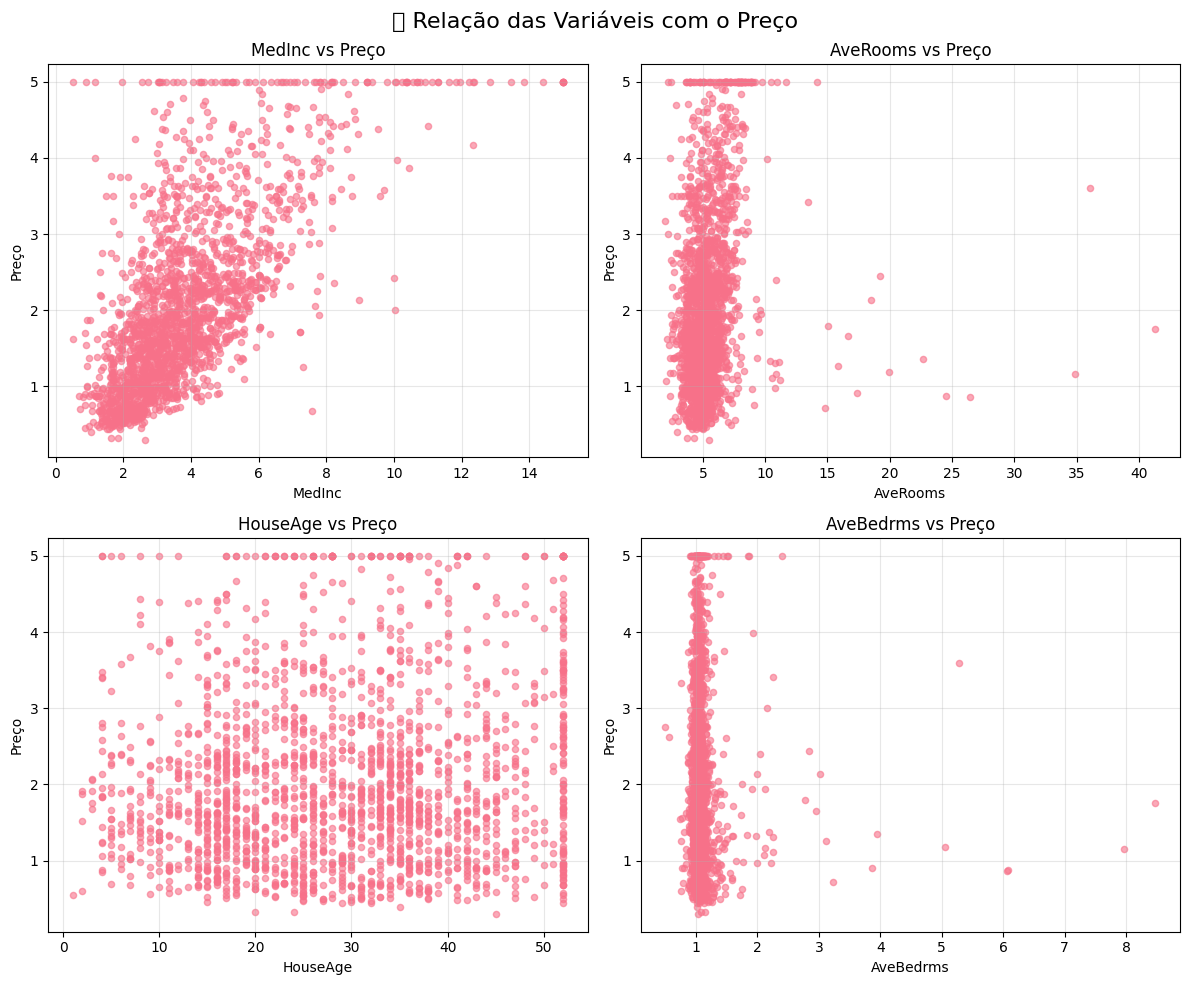

In [7]:
# üìà Visualizando as rela√ß√µes mais fortes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('üìà Rela√ß√£o das Vari√°veis com o Pre√ßo', fontsize=16)

# Selecionando 4 vari√°veis mais interessantes
variaveis_importantes = ['MedInc', 'AveRooms', 'HouseAge', 'AveBedrms']

for i, variavel in enumerate(variaveis_importantes):
    row = i // 2
    col = i % 2
    
    # Pegando uma amostra para n√£o sobrecarregar o gr√°fico
    sample = df.sample(2000, random_state=42)
    
    axes[row, col].scatter(sample[variavel], sample['target'], alpha=0.6, s=20)
    axes[row, col].set_xlabel(variavel)
    axes[row, col].set_ylabel('Pre√ßo')
    axes[row, col].set_title(f'{variavel} vs Pre√ßo')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## üéØ 6. Preparando os Dados para o Modelo

Agora vamos preparar nossos dados para treinar o modelo!

In [8]:
# üéØ Vamos come√ßar SIMPLES: usar s√≥ a RENDA para predizer PRE√áO
print("üéØ PREPARANDO OS DADOS")
print("=" * 25)

# X = features (caracter√≠sticas) - o que usamos para fazer a predi√ß√£o
X_simples = df[['MedInc']]  # S√≥ a renda, por enquanto

# y = target (alvo) - o que queremos predizer
y = df['target']  # O pre√ßo das casas

print(f"‚úÖ Features (X): {X_simples.shape[0]} casas, {X_simples.shape[1]} caracter√≠stica")
print(f"‚úÖ Target (y): {y.shape[0]} pre√ßos")
print(f"\nüîç Exemplo dos dados:")
print(f"Renda m√©dia: {X_simples.iloc[0, 0]:.2f} ‚Üí Pre√ßo: ${y.iloc[0]:.1f}k")

üéØ PREPARANDO OS DADOS
‚úÖ Features (X): 20640 casas, 1 caracter√≠stica
‚úÖ Target (y): 20640 pre√ßos

üîç Exemplo dos dados:
Renda m√©dia: 8.33 ‚Üí Pre√ßo: $4.5k


## ‚úÇÔ∏è 7. Dividindo em Treino e Teste

**Por que dividir?**
- **Treino (80%)**: Para o modelo aprender
- **Teste (20%)**: Para verificar se realmente aprendeu

√â como estudar para uma prova e depois fazer a prova com quest√µes novas!

In [9]:
# ‚úÇÔ∏è Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(
    X_simples, y,           # Nossos dados
    test_size=0.2,          # 20% para teste
    random_state=42         # Para resultados reproduz√≠veis
)

print("‚úÇÔ∏è DIVIS√ÉO DOS DADOS")
print("=" * 20)
print(f"üìö Treino: {X_train.shape[0]} casas ({X_train.shape[0]/len(df)*100:.0f}%)")
print(f"üìù Teste: {X_test.shape[0]} casas ({X_test.shape[0]/len(df)*100:.0f}%)")
print(f"\nüí° O modelo vai 'estudar' com {X_train.shape[0]} casas")
print(f"üí° E vai ser 'testado' com {X_test.shape[0]} casas que ele nunca viu!")

‚úÇÔ∏è DIVIS√ÉO DOS DADOS
üìö Treino: 16512 casas (80%)
üìù Teste: 4128 casas (20%)

üí° O modelo vai 'estudar' com 16512 casas
üí° E vai ser 'testado' com 4128 casas que ele nunca viu!


## ü§ñ 8. Treinando Nosso Primeiro Modelo

Finalmente! Vamos treinar um modelo de **Regress√£o Linear**.

In [10]:
# ü§ñ Criando o modelo
print("ü§ñ TREINANDO O MODELO")
print("=" * 20)
print("üìñ Criando modelo de Regress√£o Linear...")

modelo = LinearRegression()

print("üéì Treinando com os dados de treino...")
modelo.fit(X_train, y_train)  # Aqui √© onde a m√°gica acontece!

print("‚úÖ Modelo treinado com sucesso!")
print("\nüß† O modelo aprendeu a equa√ß√£o:")
print(f"Pre√ßo = {modelo.intercept_:.4f} + {modelo.coef_[0]:.4f} √ó Renda")
print(f"\nüìä Interpreta√ß√£o:")
print(f"‚Ä¢ Se a renda = 0, o pre√ßo base seria ${modelo.intercept_:.1f}k")
print(f"‚Ä¢ Para cada unidade de renda a mais, o pre√ßo sobe ${modelo.coef_[0]:.1f}k")

ü§ñ TREINANDO O MODELO
üìñ Criando modelo de Regress√£o Linear...
üéì Treinando com os dados de treino...
‚úÖ Modelo treinado com sucesso!

üß† O modelo aprendeu a equa√ß√£o:
Pre√ßo = 0.4446 + 0.4193 √ó Renda

üìä Interpreta√ß√£o:
‚Ä¢ Se a renda = 0, o pre√ßo base seria $0.4k
‚Ä¢ Para cada unidade de renda a mais, o pre√ßo sobe $0.4k


## üîÆ 9. Fazendo Predi√ß√µes

Agora vamos ver como nosso modelo se sai com dados que ele nunca viu!

In [11]:
# üîÆ Fazendo predi√ß√µes
print("üîÆ FAZENDO PREDI√á√ïES")
print("=" * 20)

y_pred = modelo.predict(X_test)

print("üìä Exemplos de predi√ß√µes:")
print("Renda ‚Üí Real vs Predito")
print("-" * 30)

for i in range(8):
    renda = X_test.iloc[i, 0]
    preco_real = y_test.iloc[i]
    preco_predito = y_pred[i]
    diferenca = abs(preco_real - preco_predito)
    
    print(f"{renda:.1f} ‚Üí Real: ${preco_real:.1f}k, Predito: ${preco_predito:.1f}k (dif: ${diferenca:.1f}k)")

üîÆ FAZENDO PREDI√á√ïES
üìä Exemplos de predi√ß√µes:
Renda ‚Üí Real vs Predito
------------------------------
1.7 ‚Üí Real: $0.5k, Predito: $1.1k (dif: $0.7k)
2.5 ‚Üí Real: $0.5k, Predito: $1.5k (dif: $1.0k)
3.5 ‚Üí Real: $5.0k, Predito: $1.9k (dif: $3.1k)
5.7 ‚Üí Real: $2.2k, Predito: $2.9k (dif: $0.7k)
3.7 ‚Üí Real: $2.8k, Predito: $2.0k (dif: $0.8k)
4.7 ‚Üí Real: $1.6k, Predito: $2.4k (dif: $0.8k)
5.1 ‚Üí Real: $2.0k, Predito: $2.6k (dif: $0.6k)
3.7 ‚Üí Real: $1.6k, Predito: $2.0k (dif: $0.4k)


## üìè 10. Avaliando o Modelo

Como saber se nosso modelo √© bom? Vamos usar **m√©tricas**!

In [13]:
# üìè Calculando m√©tricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("üìè AVALIA√á√ÉO DO MODELO")
print("=" * 25)
print(f"MSE (Erro Quadr√°tico M√©dio): {mse:.4f}")
print(f"RMSE (Raiz do MSE): {rmse:.4f}")
print(f"MAE (Erro Absoluto M√©dio): {mae:.4f}")
print(f"R¬≤ (Coeficiente de Determina√ß√£o): {r2:.4f}")

print(f"\nüí° INTERPRETA√á√ÉO:")
print(f"üìä R¬≤ = {r2:.1%} significa que nosso modelo explica {r2:.1%} da varia√ß√£o nos pre√ßos")
print(f"üìä RMSE = ${rmse:.0f}k √© o erro m√©dio das nossas predi√ß√µes")
print(f"üìä Em m√©dia, erramos por ${mae:.0f}k para mais ou para menos")

# Interpreta√ß√£o do R¬≤
if r2 > 0.8:
    print("üéâ Modelo EXCELENTE!")
elif r2 > 0.6:
    print("üòä Modelo BOM!")
elif r2 > 0.4:
    print("ü§î Modelo RAZO√ÅVEL")
else:
    print("üòû Modelo PRECISA MELHORAR")

üìè AVALIA√á√ÉO DO MODELO
MSE (Erro Quadr√°tico M√©dio): 0.7091
RMSE (Raiz do MSE): 0.8421
MAE (Erro Absoluto M√©dio): 0.6299
R¬≤ (Coeficiente de Determina√ß√£o): 0.4589

üí° INTERPRETA√á√ÉO:
üìä R¬≤ = 45.9% significa que nosso modelo explica 45.9% da varia√ß√£o nos pre√ßos
üìä RMSE = $1k √© o erro m√©dio das nossas predi√ß√µes
üìä Em m√©dia, erramos por $1k para mais ou para menos
ü§î Modelo RAZO√ÅVEL


/var/folders/lk/j2v60jvx5sdgx3dm_16q4nxm0000gn/T/ipykernel_76956/93097262.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lk/j2v60jvx5sdgx3dm_16q4nxm0000gn/T/ipykernel_76956/93097262.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


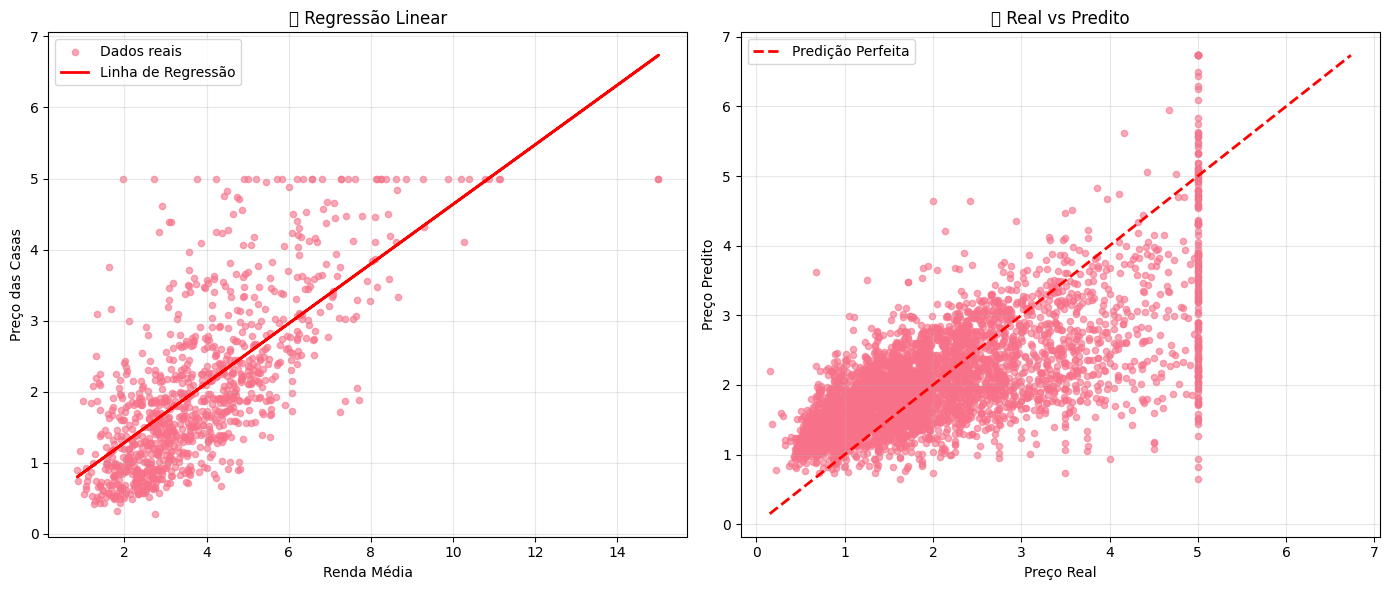

üí° No gr√°fico da direita:
‚Ä¢ Pontos na linha vermelha = predi√ß√µes perfeitas
‚Ä¢ Pontos dispersos = modelo tem dificuldade


In [14]:
# üìà Visualizando os resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gr√°fico 1: Reta de regress√£o
# Pegando uma amostra para n√£o sobrecarregar
sample_size = 1000
sample_idx = np.random.choice(len(X_test), sample_size, replace=False)
X_sample = X_test.iloc[sample_idx]
y_sample = y_test.iloc[sample_idx]
y_pred_sample = y_pred[sample_idx]

axes[0].scatter(X_sample, y_sample, alpha=0.6, s=20, label='Dados reais')
axes[0].plot(X_sample, y_pred_sample, color='red', linewidth=2, label='Linha de Regress√£o')
axes[0].set_xlabel('Renda M√©dia')
axes[0].set_ylabel('Pre√ßo das Casas')
axes[0].set_title('üìà Regress√£o Linear')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gr√°fico 2: Real vs Predito
axes[1].scatter(y_test, y_pred, alpha=0.6, s=20)
# Linha diagonal perfeita
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predi√ß√£o Perfeita')
axes[1].set_xlabel('Pre√ßo Real')
axes[1].set_ylabel('Pre√ßo Predito')
axes[1].set_title('üìä Real vs Predito')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("üí° No gr√°fico da direita:")
print("‚Ä¢ Pontos na linha vermelha = predi√ß√µes perfeitas")
print("‚Ä¢ Pontos dispersos = modelo tem dificuldade")

## üåü 11. Melhorando o Modelo: M√∫ltiplas Vari√°veis

Usar s√≥ a renda √© limitado. Vamos usar mais vari√°veis!

In [15]:
# üåü Usando m√∫ltiplas vari√°veis
print("üåü MELHORANDO O MODELO")
print("=" * 25)

# Selecionando as 4 vari√°veis mais correlacionadas
features_importantes = ['MedInc', 'AveRooms', 'HouseAge', 'AveBedrms']
X_multiplo = df[features_importantes]

print(f"üìä Agora usando {len(features_importantes)} vari√°veis: {features_importantes}")

# Dividindo novamente
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_multiplo, y, test_size=0.2, random_state=42
)

# Treinando modelo m√∫ltiplo
modelo_mult = LinearRegression()
modelo_mult.fit(X_train_mult, y_train_mult)

# Predi√ß√µes
y_pred_mult = modelo_mult.predict(X_test_mult)

# M√©tricas do modelo m√∫ltiplo
r2_mult = r2_score(y_test_mult, y_pred_mult)
rmse_mult = np.sqrt(mean_squared_error(y_test_mult, y_pred_mult))
mae_mult = mean_absolute_error(y_test_mult, y_pred_mult)

print(f"\nüìä COMPARA√á√ÉO DOS MODELOS")
print("=" * 30)
print(f"Modelo Simples (1 vari√°vel):")
print(f"  R¬≤: {r2:.4f} | RMSE: ${rmse:.0f}k | MAE: ${mae:.0f}k")
print(f"Modelo M√∫ltiplo (4 vari√°veis):")
print(f"  R¬≤: {r2_mult:.4f} | RMSE: ${rmse_mult:.0f}k | MAE: ${mae_mult:.0f}k")

# Calculando melhoria
melhoria_r2 = ((r2_mult - r2) / r2) * 100
melhoria_rmse = ((rmse - rmse_mult) / rmse) * 100

print(f"\nüöÄ MELHORIA:")
print(f"üìà R¬≤ melhorou {melhoria_r2:.1f}%")
print(f"üìâ RMSE melhorou {melhoria_rmse:.1f}%")

print(f"\nüìä Import√¢ncia das vari√°veis (coeficientes):")
for feature, coef in zip(features_importantes, modelo_mult.coef_):
    print(f"‚Ä¢ {feature}: {coef:.4f}")

üåü MELHORANDO O MODELO
üìä Agora usando 4 vari√°veis: ['MedInc', 'AveRooms', 'HouseAge', 'AveBedrms']

üìä COMPARA√á√ÉO DOS MODELOS
Modelo Simples (1 vari√°vel):
  R¬≤: 0.4589 | RMSE: $1k | MAE: $1k
Modelo M√∫ltiplo (4 vari√°veis):
  R¬≤: 0.5089 | RMSE: $1k | MAE: $1k

üöÄ MELHORIA:
üìà R¬≤ melhorou 10.9%
üìâ RMSE melhorou 4.7%

üìä Import√¢ncia das vari√°veis (coeficientes):
‚Ä¢ MedInc: 0.5453
‚Ä¢ AveRooms: -0.2246
‚Ä¢ HouseAge: 0.0161
‚Ä¢ AveBedrms: 1.1130


## üîÑ 12. Regress√£o Polinomial: Capturando N√£o-Linearidade

E se a rela√ß√£o n√£o for uma reta? Vamos tentar **curvas**!

In [16]:
# üîÑ Explorando Regress√£o Polinomial
print("üîÑ REGRESS√ÉO POLINOMIAL")
print("=" * 25)
print("üí° Vamos testar se curvas funcionam melhor que retas!")

# Voltando para 1 vari√°vel para visualizar melhor
X_poly_base = df[['MedInc']]
y_poly = df['target']

# Testando diferentes graus de polin√¥mio
graus = [1, 2, 3, 4, 5]
resultados_poly = {}

print(f"\nüß™ Testando graus polinomiais: {graus}")

for grau in graus:
    print(f"\nüìä Testando grau {grau}...")
    
    # Transforma√ß√£o polinomial (aqui a m√°gica acontece!)
    poly_features = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly_features.fit_transform(X_poly_base)
    
    # Divis√£o treino/teste
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y_poly, test_size=0.2, random_state=42
    )
    
    # Treinamento
    modelo_poly = LinearRegression()
    modelo_poly.fit(X_train_poly, y_train_poly)
    
    # Predi√ß√µes
    y_pred_poly = modelo_poly.predict(X_test_poly)
    
    # M√©tricas
    r2_poly = r2_score(y_test_poly, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
    
    resultados_poly[grau] = {
        'r2': r2_poly, 
        'rmse': rmse_poly,
        'modelo': modelo_poly,
        'poly_features': poly_features
    }
    
    print(f"  R¬≤: {r2_poly:.4f} | RMSE: {rmse_poly:.4f}")

print(f"\nüìä RESUMO DOS RESULTADOS:")
print("Grau | R¬≤     | RMSE")
print("-" * 20)
for grau, metricas in resultados_poly.items():
    print(f"{grau:4d} | {metricas['r2']:.4f} | {metricas['rmse']:.4f}")

üîÑ REGRESS√ÉO POLINOMIAL
üí° Vamos testar se curvas funcionam melhor que retas!

üß™ Testando graus polinomiais: [1, 2, 3, 4, 5]

üìä Testando grau 1...
  R¬≤: 0.4589 | RMSE: 0.8421

üìä Testando grau 2...
  R¬≤: 0.4633 | RMSE: 0.8386

üìä Testando grau 3...
  R¬≤: 0.4671 | RMSE: 0.8356

üìä Testando grau 4...
  R¬≤: 0.4673 | RMSE: 0.8355

üìä Testando grau 5...
  R¬≤: 0.4668 | RMSE: 0.8359

üìä RESUMO DOS RESULTADOS:
Grau | R¬≤     | RMSE
--------------------
   1 | 0.4589 | 0.8421
   2 | 0.4633 | 0.8386
   3 | 0.4671 | 0.8356
   4 | 0.4673 | 0.8355
   5 | 0.4668 | 0.8359


/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/arnaldoalvesvianajunior/DisruptiveArchitectures/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/arnaldoalvesviana

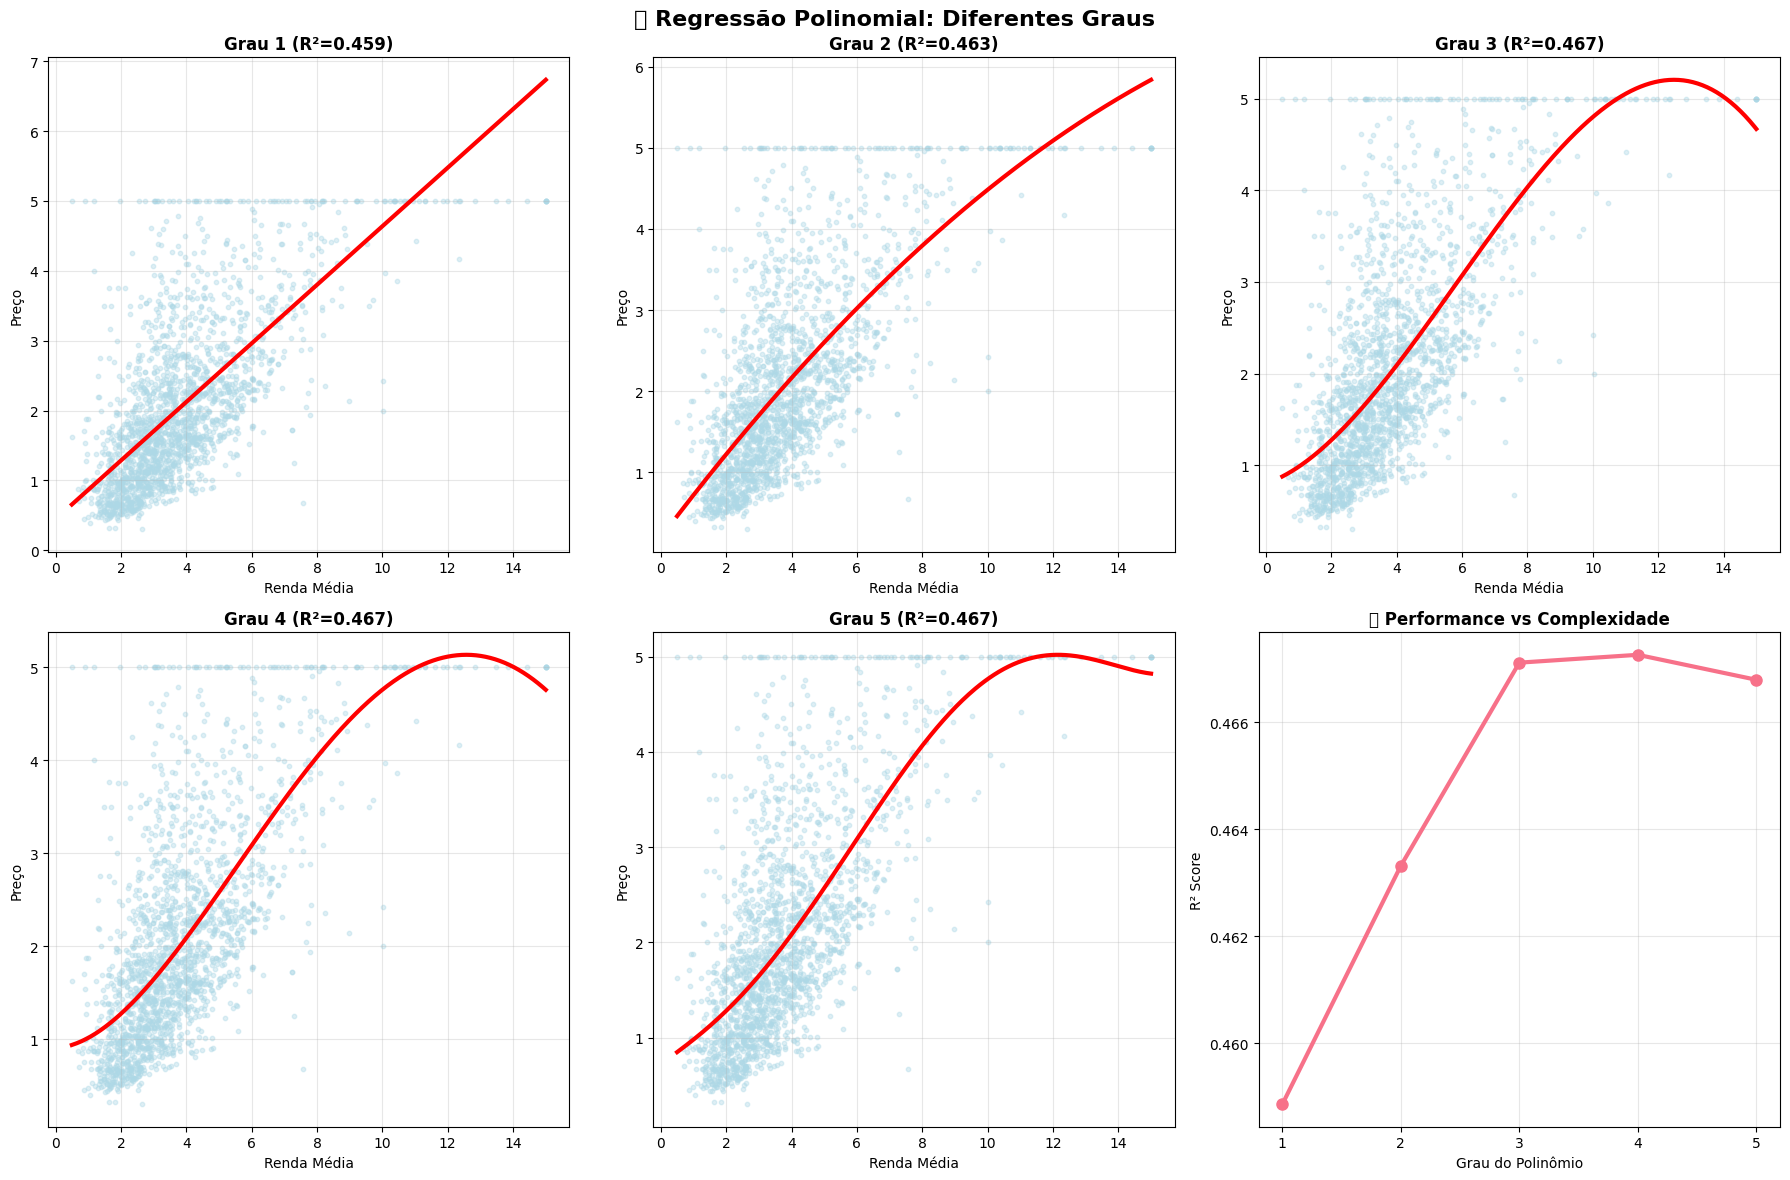

üèÜ Melhor grau: 4 (R¬≤ = 0.4673)


In [17]:
# üìä Visualizando diferentes graus polinomiais
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('üîÑ Regress√£o Polinomial: Diferentes Graus', fontsize=16, fontweight='bold')

# Sample dos dados para n√£o sobrecarregar
sample_data = df.sample(2000, random_state=42)
X_sample = sample_data[['MedInc']]
y_sample = sample_data['target']

for i, grau in enumerate(graus):
    row = i // 3
    col = i % 3
    
    # Dados para plotar a curva suave
    X_plot = np.linspace(X_poly_base.min().values[0], X_poly_base.max().values[0], 300).reshape(-1, 1)
    poly_features = resultados_poly[grau]['poly_features']
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = resultados_poly[grau]['modelo'].predict(X_plot_poly)
    
    # Plot
    axes[row, col].scatter(X_sample, y_sample, alpha=0.4, s=10, color='lightblue')
    axes[row, col].plot(X_plot, y_plot, color='red', linewidth=3)
    axes[row, col].set_title(f'Grau {grau} (R¬≤={resultados_poly[grau]["r2"]:.3f})', fontweight='bold')
    axes[row, col].set_xlabel('Renda M√©dia')
    axes[row, col].set_ylabel('Pre√ßo')
    axes[row, col].grid(True, alpha=0.3)

# Gr√°fico de compara√ß√£o
axes[1, 2].plot(graus, [resultados_poly[g]['r2'] for g in graus], 'o-', linewidth=3, markersize=8)
axes[1, 2].set_xlabel('Grau do Polin√¥mio')
axes[1, 2].set_ylabel('R¬≤ Score')
axes[1, 2].set_title('üìà Performance vs Complexidade', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_xticks(graus)

plt.tight_layout()
plt.show()

# Encontrando o melhor grau
melhor_grau = max(resultados_poly.keys(), key=lambda x: resultados_poly[x]['r2'])
print(f"üèÜ Melhor grau: {melhor_grau} (R¬≤ = {resultados_poly[melhor_grau]['r2']:.4f})")

## ‚ö†Ô∏è 13. Overfitting vs Underfitting

**Overfitting**: Modelo muito complexo (decora em vez de aprender)
**Underfitting**: Modelo muito simples (n√£o consegue aprender)

Vamos testar isso!

In [18]:
# ‚ö†Ô∏è Testando overfitting com graus muito altos
print("‚ö†Ô∏è  TESTANDO OVERFITTING")
print("=" * 25)

graus_extremos = [1, 2, 5, 10, 15]
resultados_overfitting = {}

for grau in graus_extremos:
    # Prepara√ß√£o
    poly_features = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly_features.fit_transform(X_poly_base)
    
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y_poly, test_size=0.2, random_state=42
    )
    
    # Treinamento
    modelo_poly = LinearRegression()
    modelo_poly.fit(X_train_poly, y_train_poly)
    
    # Avalia√ß√£o no TREINO e no TESTE
    y_train_pred = modelo_poly.predict(X_train_poly)
    y_test_pred = modelo_poly.predict(X_test_poly)
    
    r2_train = r2_score(y_train_poly, y_train_pred)
    r2_test = r2_score(y_test_poly, y_test_pred)
    
    resultados_overfitting[grau] = {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'diferenca': r2_train - r2_test
    }

print("Grau | R¬≤ Treino | R¬≤ Teste | Diferen√ßa | Status")
print("-" * 55)

for grau, resultado in resultados_overfitting.items():
    r2_train = resultado['r2_train']
    r2_test = resultado['r2_test']
    diff = resultado['diferenca']
    
    if diff > 0.1:
        status = "üî¥ OVERFITTING"
    elif r2_test < 0.3:
        status = "üîµ UNDERFITTING"
    else:
        status = "üü¢ BOM"
    
    print(f"{grau:4d} | {r2_train:9.4f} | {r2_test:8.4f} | {diff:9.4f} | {status}")

print(f"\nüí° INTERPRETA√á√ÉO:")
print(f"‚Ä¢ üü¢ BOM: R¬≤ similar no treino e teste")
print(f"‚Ä¢ üî¥ OVERFITTING: R¬≤ muito maior no treino que no teste")
print(f"‚Ä¢ üîµ UNDERFITTING: R¬≤ baixo tanto no treino quanto no teste")

‚ö†Ô∏è  TESTANDO OVERFITTING
Grau | R¬≤ Treino | R¬≤ Teste | Diferen√ßa | Status
-------------------------------------------------------
   1 |    0.4770 |   0.4589 |    0.0181 | üü¢ BOM
   2 |    0.4816 |   0.4633 |    0.0183 | üü¢ BOM
   5 |    0.4910 |   0.4668 |    0.0242 | üü¢ BOM
  10 |    0.4929 |   0.4690 |    0.0239 | üü¢ BOM
  15 |    0.3982 |   0.3615 |    0.0367 | üü¢ BOM

üí° INTERPRETA√á√ÉO:
‚Ä¢ üü¢ BOM: R¬≤ similar no treino e teste
‚Ä¢ üî¥ OVERFITTING: R¬≤ muito maior no treino que no teste
‚Ä¢ üîµ UNDERFITTING: R¬≤ baixo tanto no treino quanto no teste


## üéØ 14. Conclus√µes e Pr√≥ximos Passos

Parab√©ns! Voc√™ completou sua introdu√ß√£o √† regress√£o!

In [19]:
# üéØ Resumo final
print("üéØ RESUMO DO QUE APRENDEMOS")
print("=" * 35)
print("‚úÖ Diferen√ßa entre classifica√ß√£o e regress√£o")
print("‚úÖ Como implementar regress√£o linear no scikit-learn")
print("‚úÖ Import√¢ncia de dividir dados em treino/teste")
print("‚úÖ Como avaliar modelos com m√©tricas (R¬≤, RMSE, MAE)")
print("‚úÖ Regress√£o polinomial para rela√ß√µes n√£o-lineares")
print("‚úÖ Problemas de overfitting e underfitting")

print(f"\nüöÄ PR√ìXIMOS PASSOS:")
print(f"‚Ä¢ Experimentar outros algoritmos (Random Forest, SVM)")
print(f"‚Ä¢ Aprender sobre valida√ß√£o cruzada")
print(f"‚Ä¢ Feature engineering (criar novas vari√°veis)")
print(f"‚Ä¢ Regulariza√ß√£o (Ridge, Lasso)")
print(f"‚Ä¢ Ensemble methods (combinar modelos)")

print(f"\nüìö CONCEITOS-CHAVE PARA LEMBRAR:")
print(f"‚Ä¢ R¬≤: % da varia√ß√£o explicada (0-1, maior = melhor)")
print(f"‚Ä¢ RMSE: Erro m√©dio em unidades originais (menor = melhor)")
print(f"‚Ä¢ Overfitting: Modelo decora em vez de aprender")
print(f"‚Ä¢ Sempre dividir dados para testar generaliza√ß√£o")

print(f"\nüéâ PARAB√âNS! Voc√™ agora sabe os fundamentos da regress√£o!")
print(f"üéØ Continue praticando com datasets diferentes!")

üéØ RESUMO DO QUE APRENDEMOS
‚úÖ Diferen√ßa entre classifica√ß√£o e regress√£o
‚úÖ Como implementar regress√£o linear no scikit-learn
‚úÖ Import√¢ncia de dividir dados em treino/teste
‚úÖ Como avaliar modelos com m√©tricas (R¬≤, RMSE, MAE)
‚úÖ Regress√£o polinomial para rela√ß√µes n√£o-lineares
‚úÖ Problemas de overfitting e underfitting

üöÄ PR√ìXIMOS PASSOS:
‚Ä¢ Experimentar outros algoritmos (Random Forest, SVM)
‚Ä¢ Aprender sobre valida√ß√£o cruzada
‚Ä¢ Feature engineering (criar novas vari√°veis)
‚Ä¢ Regulariza√ß√£o (Ridge, Lasso)
‚Ä¢ Ensemble methods (combinar modelos)

üìö CONCEITOS-CHAVE PARA LEMBRAR:
‚Ä¢ R¬≤: % da varia√ß√£o explicada (0-1, maior = melhor)
‚Ä¢ RMSE: Erro m√©dio em unidades originais (menor = melhor)
‚Ä¢ Overfitting: Modelo decora em vez de aprender
‚Ä¢ Sempre dividir dados para testar generaliza√ß√£o

üéâ PARAB√âNS! Voc√™ agora sabe os fundamentos da regress√£o!
üéØ Continue praticando com datasets diferentes!


## üìù Exerc√≠cios para Praticar

### üéØ Exerc√≠cio 1: Experimentar outras vari√°veis
1. Tente usar apenas `HouseAge` para predizer pre√ßo
2. Compare o R¬≤ com o modelo que usa `MedInc`
3. Qual vari√°vel sozinha √© melhor preditora?

### üéØ Exerc√≠cio 2: Modelo com todas as vari√°veis
1. Crie um modelo usando todas as 8 vari√°veis
2. Compare com o modelo de 4 vari√°veis
3. Houve melhoria significativa?

### üéØ Exerc√≠cio 3: Testar outros graus polinomiais
1. Teste graus 6 a 10 na regress√£o polinomial
2. Identifique sinais de overfitting
3. Qual seria o grau ideal?

### üéØ Exerc√≠cio 4: An√°lise de res√≠duos
1. Calcule os res√≠duos (diferen√ßa entre real e predito)
2. Fa√ßa um histograma dos res√≠duos
3. Os res√≠duos seguem uma distribui√ß√£o normal?

---

**üéì Boa sorte e continue aprendendo!**